# **Q2**

In [25]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np


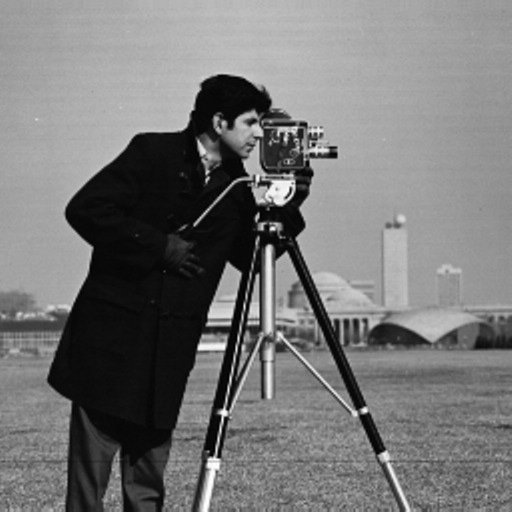

In [26]:
img = cv2.imread('/content/img1.jpg', flags=cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

# **Initial Kernels**

In [27]:
box_blur = (1/9) * np.array(
  [[1, 1, 1],
   [1, 1, 1],
   [1, 1, 1]])

edge_detector = np.array(
  [[-1, -1, -1],
   [-1, 8, -1],
   [-1, -1, -1]])

sobel_y = np.array(
  [[-1, -2, -1],
   [0, 0, 0],
   [1, 2, 1]])

sobel_x = np.array(
  [[-1, 0, 1],
   [-2, 0, 2],
   [-1, 0 , 1]]) 

Apply **box blur**

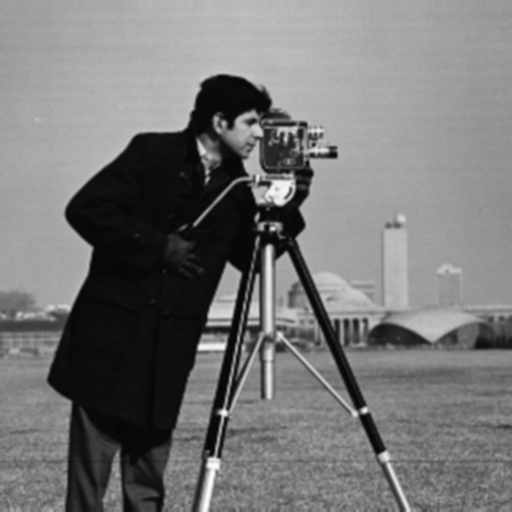

In [28]:
img_blur = cv2.filter2D(src=img, ddepth= 0,kernel=box_blur)
cv2_imshow(img_blur)

Apply **edge detector**

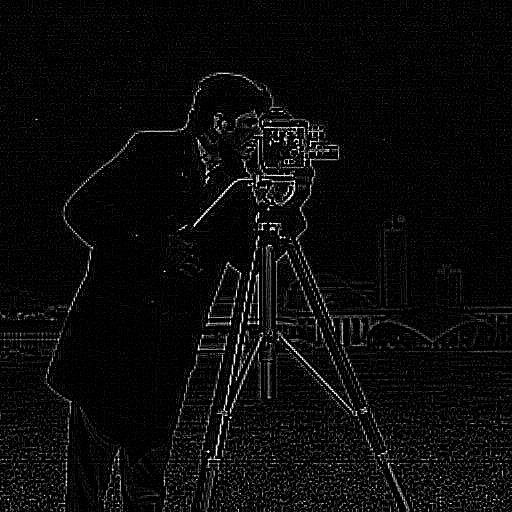

In [29]:
img_whith_edge = cv2.filter2D(src=img, ddepth= 0,kernel=edge_detector)
cv2_imshow(img_whith_edge)

Apply **sobel_y**

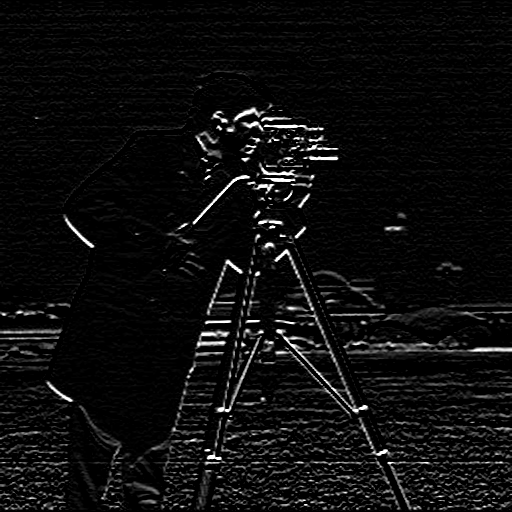

In [30]:
img_whith_sobel_y = cv2.filter2D(src=img, ddepth= 0,kernel=sobel_y)
cv2_imshow(img_whith_sobel_y)

Apply **sobel_x**

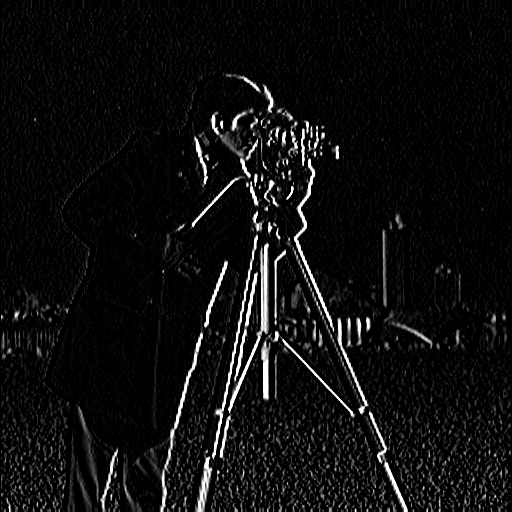

In [31]:
img_whith_sobel_x = cv2.filter2D(src=img, ddepth= 0,kernel=sobel_x)
cv2_imshow(img_whith_sobel_x)

# **Q3**

In [32]:
!pip install -q -U keras-tuner

In [33]:
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt
import numpy as np

In [34]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [35]:
def build_model(hp):
    model = keras.Sequential()
    # Tune the number of layers.
    for i in range(hp.Int("cn_num_layers", 2, 5)):
        model.add(
            layers.Conv2D(
                # Tune number of units separately.
                filters=hp.Int(f"filters_{i}", min_value=32, max_value=256, step=16),
                kernel_size=(3, 3),
                activation=hp.Choice("cn_activation", ["relu", "tanh"]),
            )
        )
    if hp.Boolean("cn_dropout"):
        model.add(layers.Dropout(rate=0.25))

    model.add(layers.Flatten())
    for i in range(hp.Int("num_layers", 1, 5)):
        model.add(
            layers.Dense(
                # Tune number of units separately.
                units=hp.Int(f"units_{i}", min_value=32, max_value=256, step=32),
                activation=hp.Choice("activation", ["relu", "tanh"]),
            )
        )
    if hp.Boolean("dropout"):
        model.add(layers.Dropout(rate=hp.Float("dropout_rate", min_value=0, max_value=0.7, step=0.1)))
    model.add(layers.Dense(10, activation="softmax"))

    
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

In [36]:
tuner = kt.BayesianOptimization(
    build_model,
    objective="val_accuracy",
    max_trials=5,
    num_initial_points=2,
    seed=np.random.seed(42)
)

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json


In [37]:
tuner.search(
    x_train, y_train,
    epochs=15,
    validation_data=(x_test, y_test)
)

Trial 5 Complete [00h 02m 24s]
val_accuracy: 0.6690000295639038

Best val_accuracy So Far: 0.7059999704360962
Total elapsed time: 00h 11m 36s
INFO:tensorflow:Oracle triggered exit


In [38]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
cn_num_layers: 4
filters_0: 48
activation: tanh
filters_1: 48
dropout: True
num_layers: 1
units_0: 224
lr: 0.00017285436854928225
filters_2: 112
filters_3: 208
units_1: 32
units_2: 192
cn_activation: relu
cn_dropout: False
dropout_rate: 0.0
Score: 0.7059999704360962
Trial summary
Hyperparameters:
cn_num_layers: 3
filters_0: 80
activation: tanh
filters_1: 32
dropout: False
num_layers: 1
units_0: 256
lr: 0.0001
filters_2: 256
filters_3: 256
units_1: 224
units_2: 256
cn_activation: relu
cn_dropout: False
dropout_rate: 0.1
Score: 0.6804999709129333
Trial summary
Hyperparameters:
cn_num_layers: 2
filters_0: 32
activation: relu
filters_1: 32
dropout: False
num_layers: 1
units_0: 256
lr: 0.0001
filters_2: 112
filters_3: 256
units_1: 96
units_2: 256
cn_activation: relu
cn_dropout: True
dropout_rate: 0.0
filters_4: 32
Score: 0.6690000295639038
Trial summary
Hyperparameters:
cn_num_layers: 5
filte